In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.6 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=100)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e90fc30d5e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

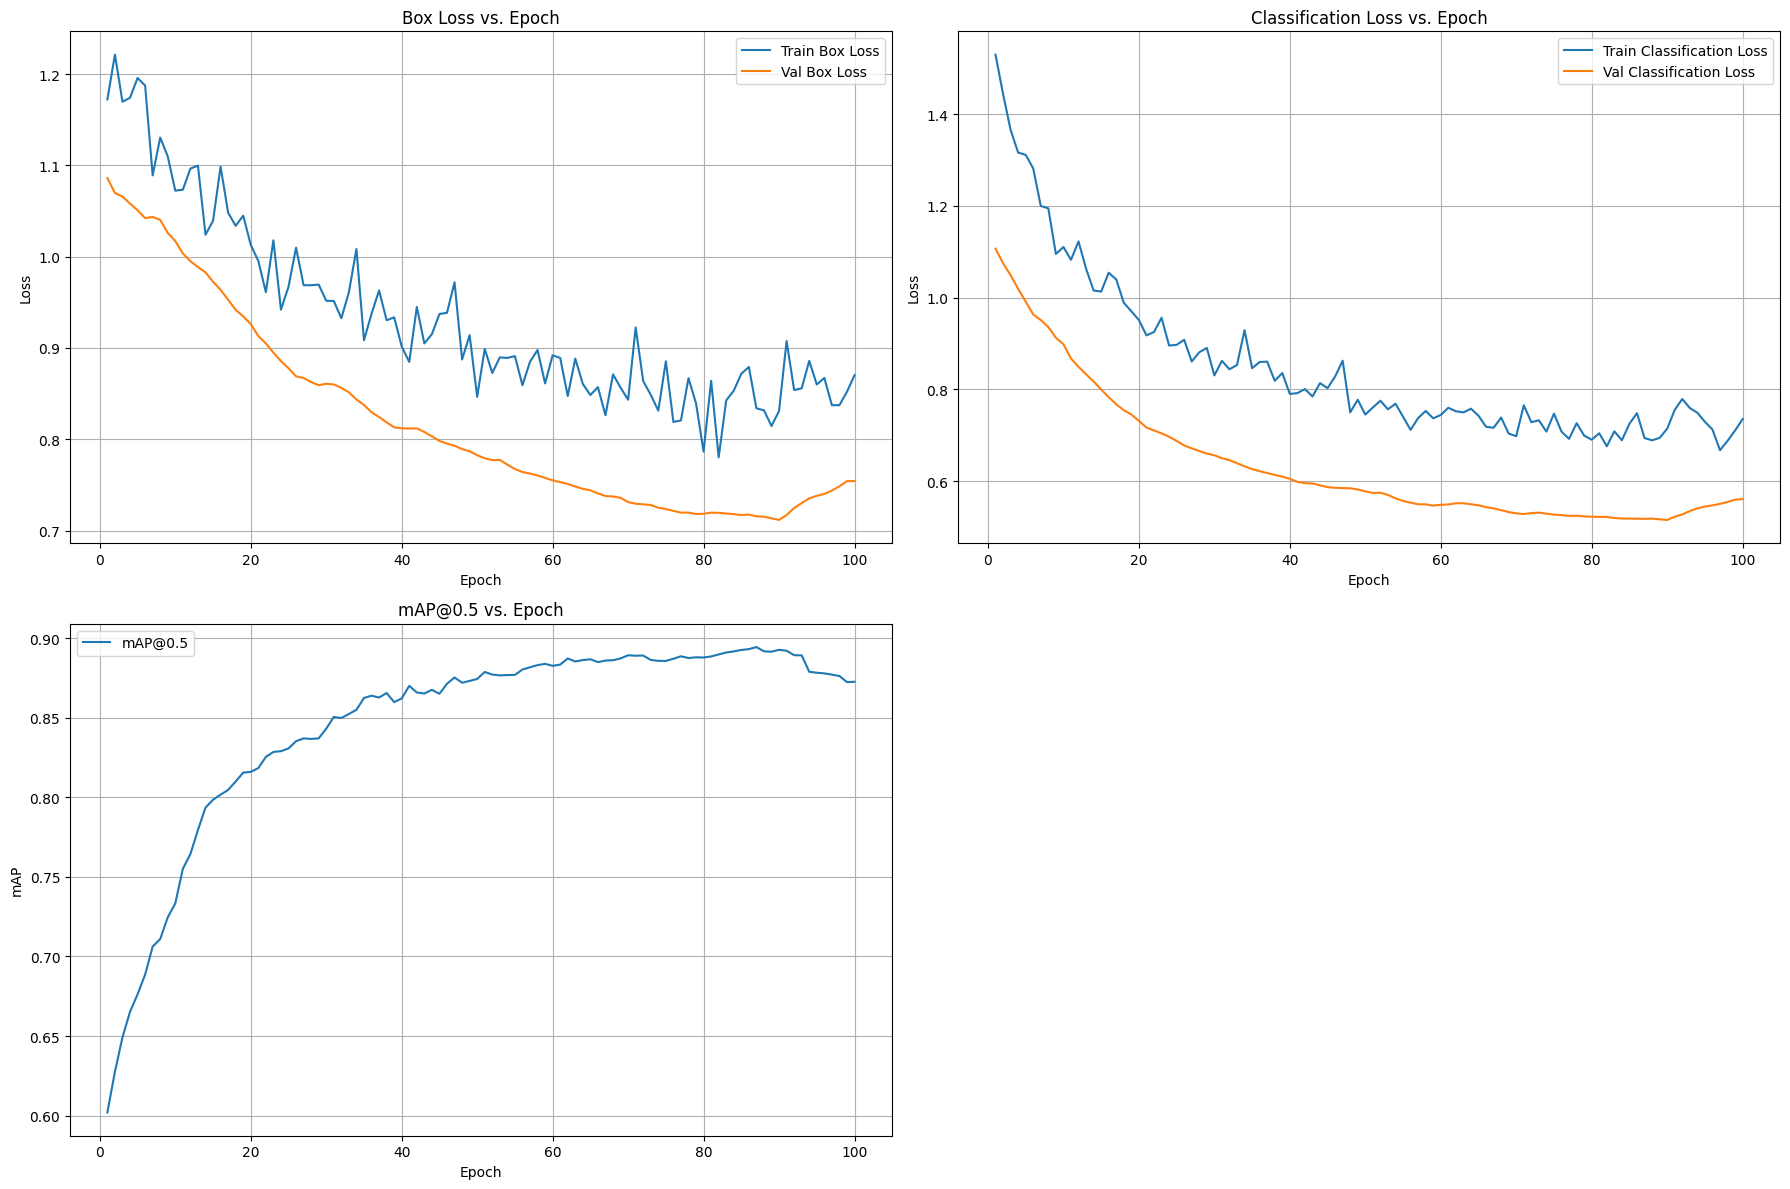

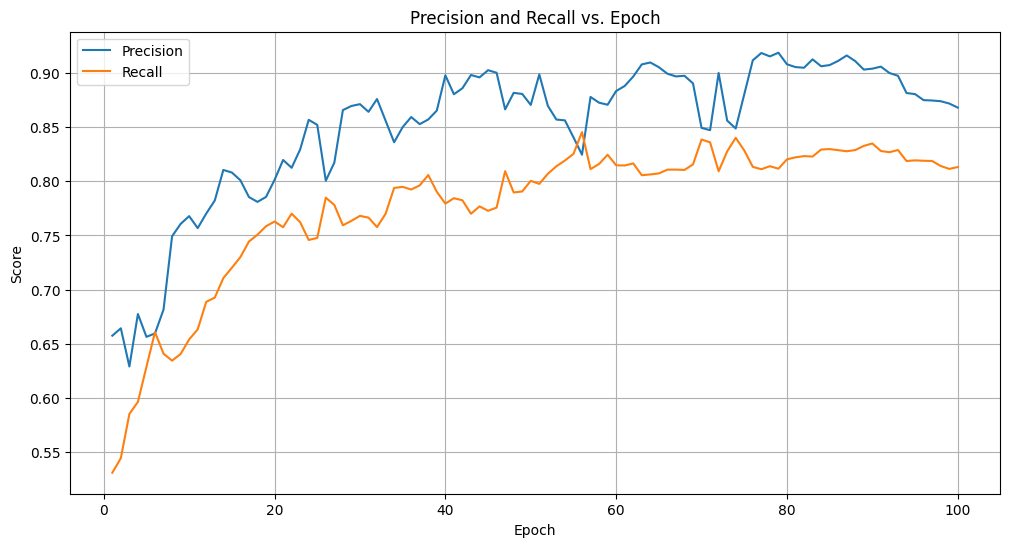

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the training results directory
# This assumes the default save directory for YOLOv8 training
results_dir = '/content/runs/detect/train'
results_path = os.path.join(results_dir, 'results.csv')

if os.path.exists(results_path):
    # Load the results CSV
    # The CSV might have leading spaces in column names, so strip them
    df_results = pd.read_csv(results_path).rename(columns=lambda x: x.strip())

    # Plotting various metrics
    plt.figure(figsize=(18, 12))

    # Plot Box Loss
    plt.subplot(2, 2, 1)
    plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
    plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Val Box Loss')
    plt.title('Box Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Removed Objectness Loss plotting as the columns 'train/obj_loss' and 'val/obj_loss' were not found
    # If you find alternative columns for objectness, you can uncomment and adjust this section
    # plt.subplot(2, 2, 2)
    # plt.plot(df_results['epoch'], df_results['train/obj_loss'], label='Train Objectness Loss')
    # plt.plot(df_results['epoch'], df_results['val/obj_loss'], label='Val Objectness Loss')
    # plt.title('Objectness Loss vs. Epoch')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.grid(True)

    # Plot Classification Loss
    plt.subplot(2, 2, 2) # Adjusted subplot position
    plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Train Classification Loss')
    plt.plot(df_results['epoch'], df_results['val/cls_loss'], label='Val Classification Loss')
    plt.title('Classification Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot mAP_0.5
    plt.subplot(2, 2, 3) # Adjusted subplot position
    plt.plot(df_results['epoch'], df_results['metrics/mAP50(B)'], label='mAP@0.5')
    plt.title('mAP@0.5 vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot Precision and Recall
    plt.figure(figsize=(12, 6))
    plt.plot(df_results['epoch'], df_results['metrics/precision(B)'], label='Precision')
    plt.plot(df_results['epoch'], df_results['metrics/recall(B)'], label='Recall')
    plt.title('Precision and Recall vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print(f"Results file not found at {results_path}. Cannot plot training metrics.")
    print("Please ensure the model training completed successfully and check the output directory.")


image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 71.5ms
Speed: 6.4ms preprocess, 71.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict


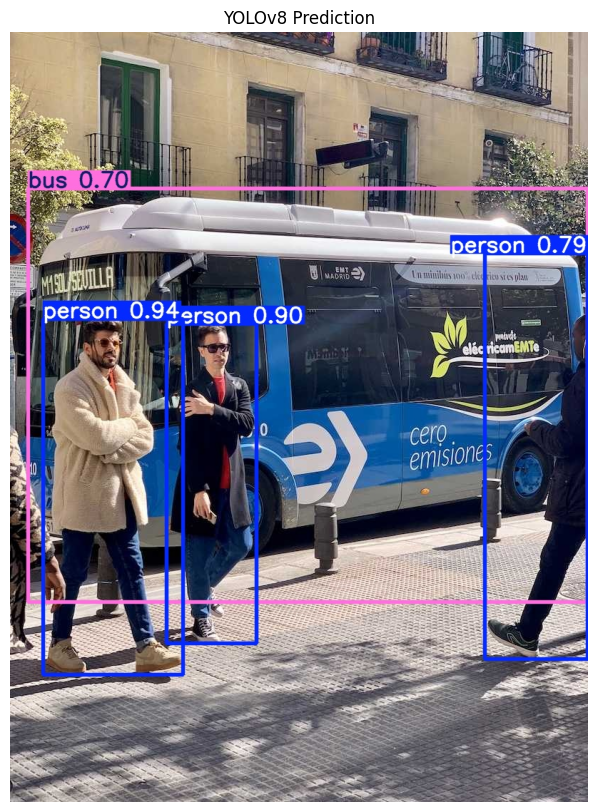

In [4]:
import cv2
import matplotlib.pyplot as plt

# Perform inference on an image
# The 'source' parameter can be a path to an image, video, or a directory.
# By default, YOLOv8 saves results to runs/detect/predict
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True, imgsz=640, conf=0.25)

# Get the path to the predicted image
# The results object contains information about the predictions, including the path to saved images.
# Assuming a single image source, the first result's path can be used.
# You might need to adjust this if processing multiple images or videos.
predicted_image_path = results[0].save_dir + '/' + results[0].path.split('/')[-1]

# Display the predicted image
img = cv2.imread(predicted_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('YOLOv8 Prediction')
plt.show()

The model has performed predictions on the image and displayed the results with bounding boxes and labels.